# <font color='green'>Project 2 
## Group 26 
### Members: 
1.Durgalakshmi Sundaraman(dxs190016)                                                                                         
2.Kruthika Natarajan Nirmala(kxn190008)

## <font color='green'> Classification


Classification Task:
- Apply two voting classifiers - one with hard voting and one with soft voting
- Apply any two models with bagging and any two models with pasting.
- Apply any two models with adaboost boosting
- Apply one model with gradient boosting
- Apply PCA on data and then apply all the models in project 1 again on data you get from PCA. Compare your results with results in project 1. You don't need to apply all the models twice. Just copy the result table from project 1, prepare similar table for all the models after PCA and compare both tables. Does PCA help in getting better results?
- Apply deep learning models covered in class

### DataSet

This dataset is  taken from kaggel from  Global Health Observatory (GHO) data repository under World Health Organization (WHO). It contains hotel booking information and includes information such as for which date booking was made, the lead time,the week night and weekend night stay, the number of adults, children, and/or babies, and the number of available parking spaces etc. There are <b>1207 total observations</b> with <b>19 columns</b>. Out of this 19 columns we have 6 categorical variables and the target column is with 1 representing a cancellation made and 0 representing no cancellation.

The <b>target variable</b> in this is <b>is_canceled</b> variable . The model works to predict the life expectancy of a person given his living conditions


### Importing necessary libraries for the project

In [1]:
#Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from math import sqrt
import warnings
warnings.filterwarnings("ignore")


### Dataset for classification

In [2]:
#reading the dataset
df_hotel = pd.read_excel("C:\\Users\\sundh\\Desktop\\ML\\ML_Project1_Group26\\ML Project\\ML Classification\\hotel_cancel_predictions.xlsx")
#checking the shape of the dataset
df_hotel.shape

(1207, 19)

<b>Column                         : Description</b><br>
<b>is_canceled </b>                    : Target variable if booking was cancelled<br>
<b>lead_time  </b>                     : No. of days between booking and hotel checkin <br>
<b>arrival_date_month</b>              : Month of hotel booking<br>
<b>arrival_date_week_number  </b>      : Week number of hotel booking<br>
<b>arrival_date_day_of_month </b>      : Day of hotel booking<br>
<b>stays_in_weekend_nights  </b>       : No. of weekend nights stayed<br>
<b>stays_in_week_nights   </b>         : No. of week nights stayed<br>
<b>adults              </b>            : No. of adults<br>
<b>children         </b>               : No. of children<br>
<b>babies         </b>                 : No. of babies<br>
<b>meal            </b>                : Meal plan booked<br>
<b>market_segment   </b>               : Market segment of the customer<br>
<b>distribution_channel </b>           : distribution channel the customer is in<br>
<b>booking_changes    </b>             : No. of booking changes made<br>
<b>deposit_type    </b>                : Deposite type made<br>
<b>days_in_waiting_list  </b>          : No. of days in waiting for booking<br>
<b>adr                   </b>          : Dollars paid<br>
<b>required_car_parking_spaces   </b>  : No. of car parking spaces<br>
<b>reservation_status      </b>        : status of reservation<br>


## Exploratory Data Analysis

The exploratory data analysis is performed on the dataset to understand the variations, range, detect outliers and collinearity if it exists in the dataset.

### <b>Check for null</b>

 Upon checking for null we find that 1728 of the data cells in the dataset have a randomly disbursed null presence

In [3]:
#Checking data information
df_hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1207 entries, 0 to 1206
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   is_canceled                  1112 non-null   float64
 1   lead_time                    1132 non-null   float64
 2   arrival_date_month           1120 non-null   object 
 3   arrival_date_week_number     1119 non-null   float64
 4   arrival_date_day_of_month    1097 non-null   float64
 5   stays_in_weekend_nights      1111 non-null   float64
 6   stays_in_week_nights         1114 non-null   float64
 7   adults                       1116 non-null   float64
 8   children                     1117 non-null   float64
 9   babies                       1124 non-null   float64
 10  meal                         1118 non-null   object 
 11  market_segment               1125 non-null   object 
 12  distribution_channel         1107 non-null   object 
 13  booking_changes   

There are totally 19 columns with more than two categorical columns 

In [4]:
#Total count of null
df_hotel.isna().sum().sum()

1728

In [5]:
#Count of null by column
df_hotel.isna().sum()

is_canceled                     95
lead_time                       75
arrival_date_month              87
arrival_date_week_number        88
arrival_date_day_of_month      110
stays_in_weekend_nights         96
stays_in_week_nights            93
adults                          91
children                        90
babies                          83
meal                            89
market_segment                  82
distribution_channel           100
booking_changes                 97
deposit_type                    90
days_in_waiting_list            93
adr                             90
required_car_parking_spaces     80
reservation_status              99
dtype: int64

To handle the null we check the data in the first five rows

In [6]:
#reading the first five rows in the dataset
df_hotel.head()

,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,market_segment,distribution_channel,booking_changes,deposit_type,days_in_waiting_list,adr,required_car_parking_spaces,reservation_status
0,0.0,26.0,March,12.0,17.0,2.0,NaN,2.0,0.0,0.0,NaN,Online TA,TA/TO,0.0,No Deposit,0.0,72.89,0.0,Check-Out
1,1.0,NaN,October,44.0,28.0,2.0,5.0,2.0,0.0,0.0,BB,Online TA,TA/TO,0.0,No Deposit,0.0,63.03,0.0,Canceled
2,0.0,0.0,April,16.0,12.0,0.0,5.0,1.0,0.0,0.0,BB,Offline TA/TO,NaN,0.0,No Deposit,0.0,55.00,0.0,NaN
3,0.0,0.0,May,21.0,NaN,1.0,1.0,2.0,0.0,0.0,BB,Online TA,TA/TO,1.0,No Deposit,0.0,79.20,0.0,Check-Out
4,0.0,138.0,NaN,13.0,NaN,0.0,3.0,2.0,0.0,0.0,BB,Offline TA/TO,TA/TO,1.0,No Deposit,0.0,42.67,0.0,Check-Out


<b>Handle Null</b>
To handle the null, we choose to impute the mean value of the numeric columns and for categorical variables we have imputed the value with most count

In [7]:
#Fill NULL with mean of the column data
df_hotel['is_canceled'].fillna(df_hotel['is_canceled'].mean(), inplace=True)
df_hotel['lead_time'].fillna(df_hotel['lead_time'].mean(), inplace=True)
df_hotel['arrival_date_day_of_month'].fillna(df_hotel['arrival_date_day_of_month'].mean(), inplace=True)
df_hotel['stays_in_weekend_nights'].fillna(df_hotel['stays_in_weekend_nights'].mean(), inplace=True)
df_hotel['stays_in_week_nights'].fillna(df_hotel['stays_in_week_nights'].mean(), inplace=True)
df_hotel['adults'].fillna(df_hotel['adults'].mean(), inplace=True)
df_hotel['children'].fillna(df_hotel['children'].mean(), inplace=True)
df_hotel['adr'].fillna(df_hotel['adr'].mean(), inplace=True)
df_hotel['booking_changes'].fillna(df_hotel['booking_changes'].mean(), inplace=True)
df_hotel['market_segment'].fillna(df_hotel['market_segment'].value_counts().index[0], inplace=True)
df_hotel['arrival_date_week_number'].fillna(df_hotel['arrival_date_week_number'].mean(), inplace=True)
df_hotel['arrival_date_month'].fillna(df_hotel['arrival_date_month'].value_counts().index[0], inplace=True)
df_hotel['babies'].fillna(df_hotel['babies'].mean(), inplace=True)
df_hotel['meal'].fillna(df_hotel['meal'].value_counts().index[0], inplace=True)
df_hotel['distribution_channel'].fillna(df_hotel['distribution_channel'].value_counts().index[0], inplace=True)
df_hotel['required_car_parking_spaces'].fillna(df_hotel['required_car_parking_spaces'].mean(), inplace=True)
df_hotel['reservation_status'].fillna(df_hotel['reservation_status'].value_counts().index[0], inplace=True)
df_hotel['days_in_waiting_list'].fillna(df_hotel['days_in_waiting_list'].mean(), inplace=True)
df_hotel['deposit_type'].fillna(df_hotel['deposit_type'].value_counts().index[0], inplace=True)


We check to see if all the columns have 0 null presence

In [8]:
#checking for nulls in each column
df_hotel.isna().sum()

is_canceled                    0
lead_time                      0
arrival_date_month             0
arrival_date_week_number       0
arrival_date_day_of_month      0
stays_in_weekend_nights        0
stays_in_week_nights           0
adults                         0
children                       0
babies                         0
meal                           0
market_segment                 0
distribution_channel           0
booking_changes                0
deposit_type                   0
days_in_waiting_list           0
adr                            0
required_car_parking_spaces    0
reservation_status             0
dtype: int64

In [9]:
#Changing the datatype from float to integer
df_hotel['lead_time']=df_hotel['lead_time'].astype(int)
df_hotel['arrival_date_day_of_month']=df_hotel['arrival_date_day_of_month'].astype(int)
df_hotel['stays_in_weekend_nights']=df_hotel['stays_in_weekend_nights'].astype(int)
df_hotel['stays_in_week_nights']=df_hotel['stays_in_week_nights'].astype(int)
df_hotel['stays_in_weekend_nights']=df_hotel['stays_in_weekend_nights'].astype(int)
df_hotel['adults']=df_hotel['adults'].astype(int)
df_hotel['children']=df_hotel['children'].astype(int)
df_hotel['booking_changes']=df_hotel['booking_changes'].astype(int)
df_hotel['is_canceled']=df_hotel['is_canceled'].astype(int)



### Data Visualisation

We check the spread of the target variable is_canceled. We see that most of the hotel bookings in our dataset are not canceled.

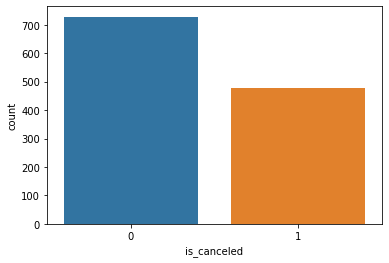

In [10]:
#Plot depicting the number of cancellations
sns.countplot(data=df_hotel,x=df_hotel.is_canceled)
plt.show()

Visualising the spread of cancellations and booking over the months. 
It can be seen that most of the bookings done in March are not cancelled and August has least booking.
Maximum booking cancellation are also done in March with least in January

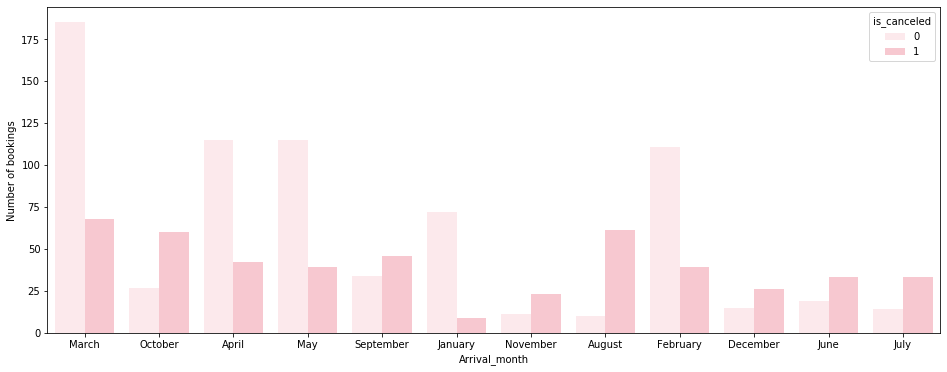

In [11]:
#Plotting number of cancellations and confirmed bookings done month-wise
plt.figure(figsize=(16, 6))
plot2=sns.countplot(data=df_hotel,x=df_hotel.arrival_date_month,hue=df_hotel.is_canceled,color='Pink')
plot2.set(xlabel="Arrival_month", ylabel="Number of bookings")
plt.show()

Checking the presence of outliera in is_canceled with respect to the lead time which is the number of days between the booking made and the date of hotel stay
We find that as the lead days increases, the outliers are present in both cancelled as well as confirmed bookings.
But we dont remove these to as it would be the case in real time data

<Figure size 1440x432 with 0 Axes>

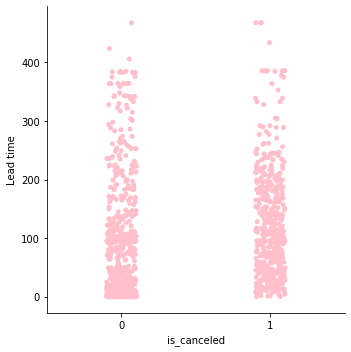

In [12]:
#PLotting the scatterplot of lead times of canceled and confirmed bookings
plt.figure(figsize=(20, 6))
plot2=sns.catplot(data=df_hotel,x='is_canceled',y='lead_time',color='Pink')#,order=[0,1]
plot2.set(xlabel="is_canceled", ylabel="Lead time")
plt.show()

Cancelled a booking always puts a hole in the pocket. We can see the variation in the dollars spent in this case.

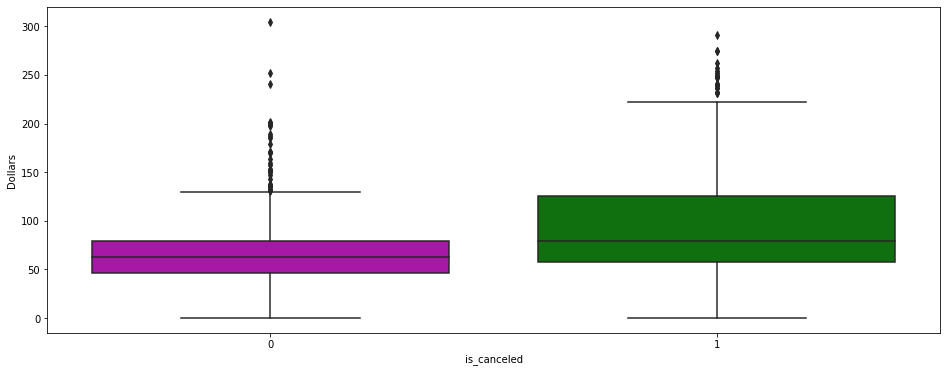

In [13]:
# Plotting the box plot depicting the dollar amount spent for canceled and confirmed bookings
plt.figure(figsize=(16, 6))
plot3=sns.boxplot(data=df_hotel,x='is_canceled', y='adr',
            palette=["m", "g"])
#sns.despine(offset=10, trim=True)
plot3.set(xlabel="is_canceled", ylabel="Dollars")
plt.show()

Weekends are always for getaways and sometime it ends up with a spoiler. This can be seen in the plot below showing that cancellations are more in weekend night stays as people tentatively make a booking

<Figure size 1440x432 with 0 Axes>

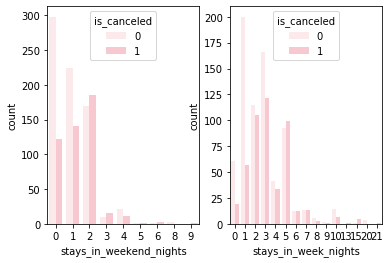

In [14]:
#Plotting the count of canceled and confirmed bookings having weekend and week nights 
plt.figure(figsize=(20, 6))
fig, ax =plt.subplots(1,2)
sns.countplot(data=df_hotel,x='stays_in_weekend_nights',hue='is_canceled',color='Pink', ax=ax[0])
sns.countplot(data=df_hotel,x='stays_in_week_nights',hue='is_canceled',color='Pink', ax=ax[1])
plt.show()


The number of changes made to a booking are visualised and can be infered that people who dont cancel make more changes to their bookings

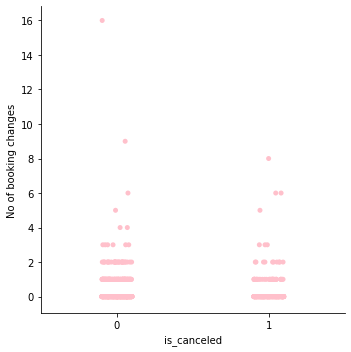

In [15]:
#Plotting the booking changes done for canceled and confirmed bookings
plot2=sns.catplot(data=df_hotel,x='is_canceled',y='booking_changes',color='Pink')
plot2.set(xlabel="is_canceled", ylabel="No of booking changes")
plt.show()

When no deposit is expected upfront to make a booking, people are seen to book more and cancel it as well

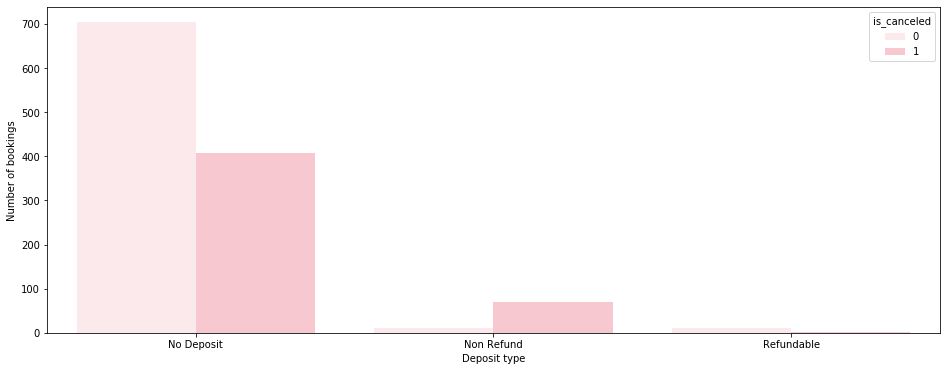

In [16]:
#Plotting the deposit type for confirmed and canceled bookings
plt.figure(figsize=(16, 6))
plot2=sns.countplot(data=df_hotel,x='deposit_type',hue='is_canceled',color='Pink')
plot2.set(xlabel="Deposit type", ylabel="Number of bookings")
plt.show()

We check for correlation among the variables

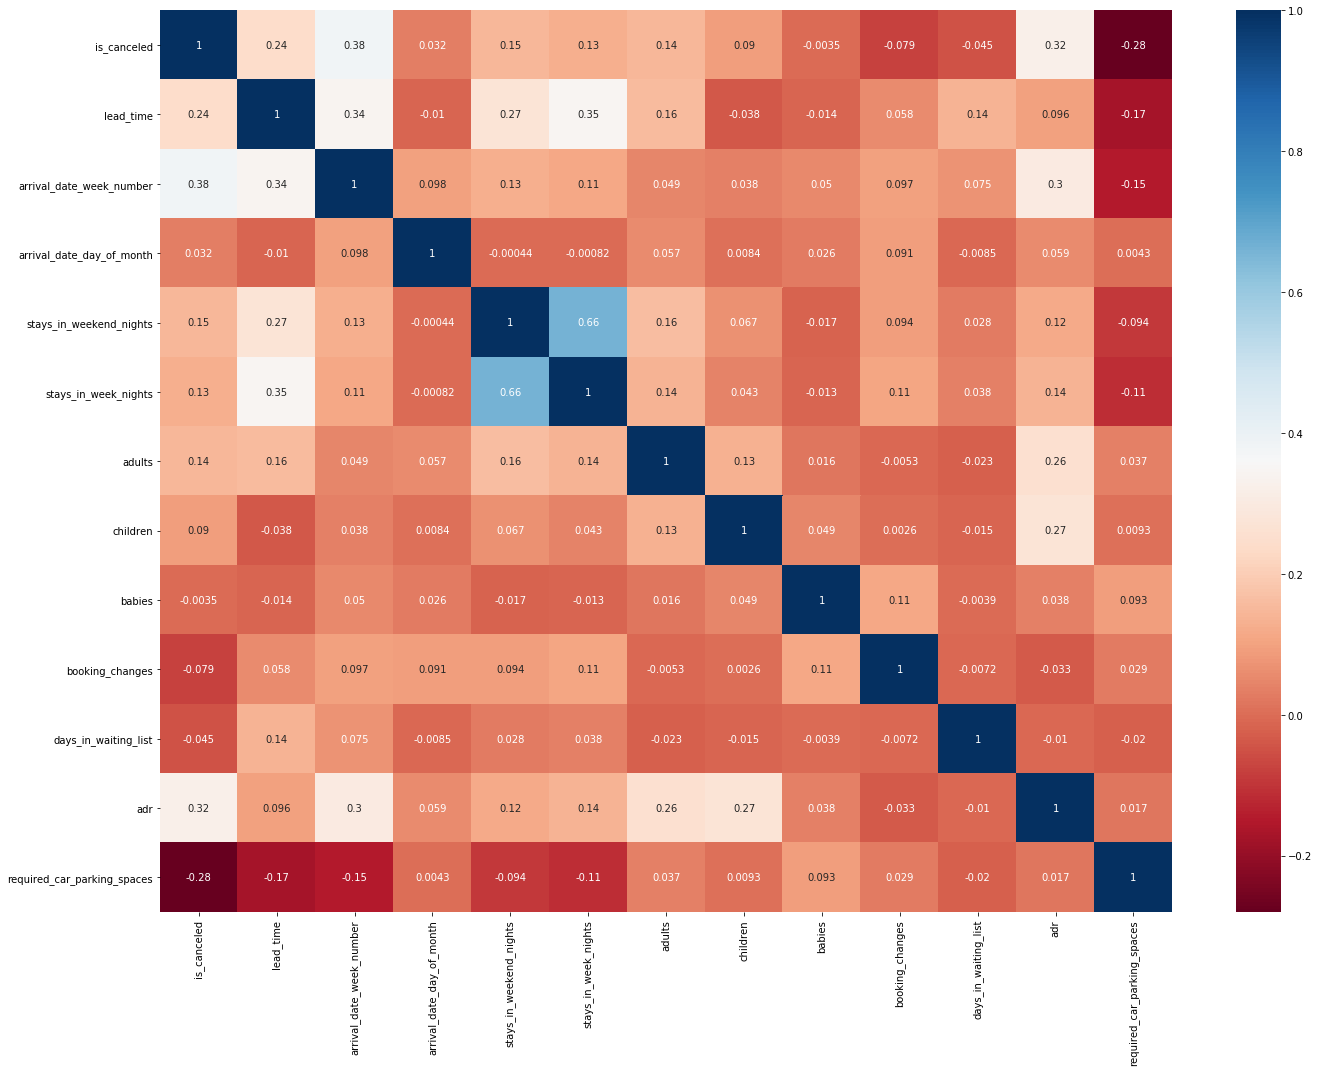

In [17]:
# Making Correlation Matrix to find the relations between the variables
plt.figure(figsize=(20,15))
sns.heatmap(df_hotel.corr(), cmap='RdBu', annot=True)
plt.tight_layout()

Distribution of all variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D1CB2B2388>,
      dtype=object)

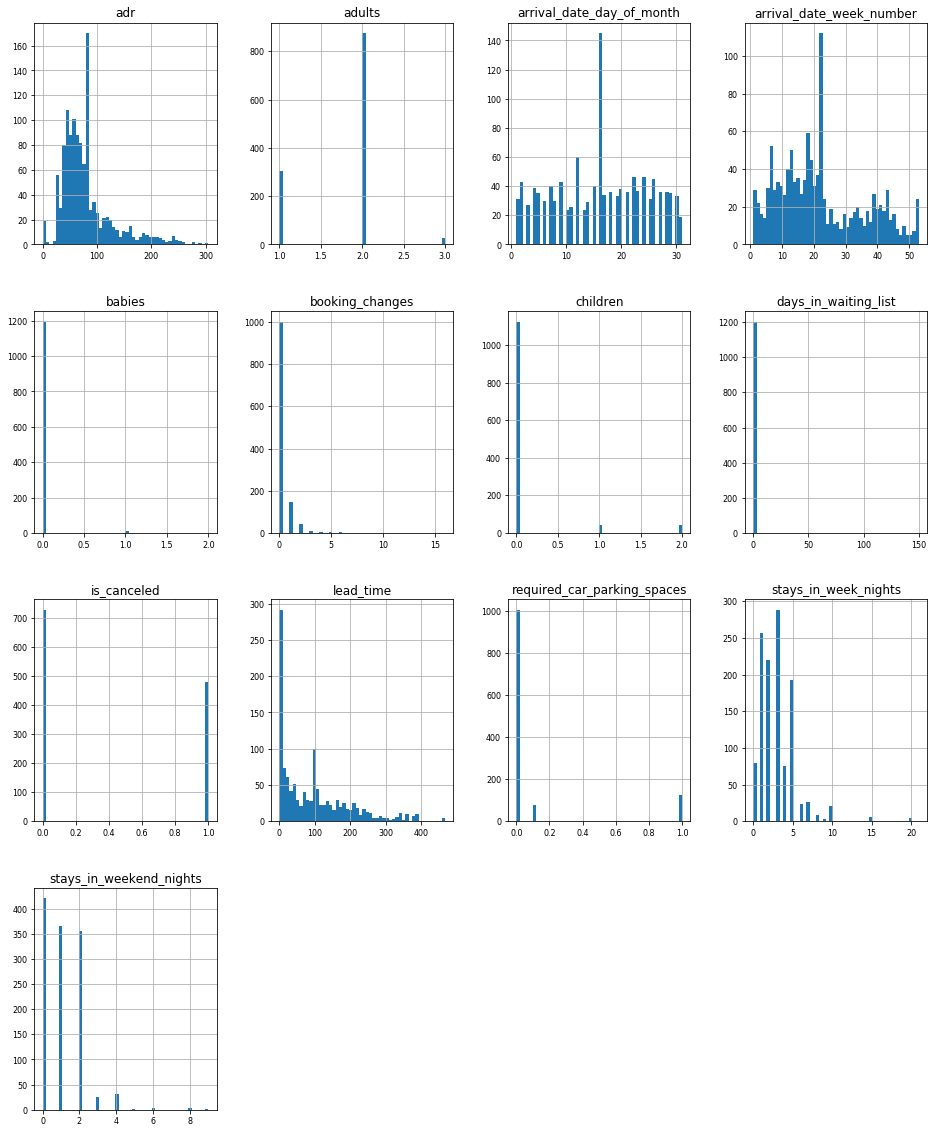

In [18]:
#Further exploration using histogram to check the distributions
df_hotel.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

### Handle categorical variables

The categorical variables need to be converted to dummy variables which add more columns. Categorical variables will be represented as 0 or 1 in the columns 

In [19]:
#creating dummies for arrival_date_month column
cols = pd.get_dummies(df_hotel['arrival_date_month'], prefix= 'arrival_month')
df_hotel[cols.columns] = cols
df_hotel.drop('arrival_date_month', axis = 1, inplace = True)

In [20]:
#creating dummies for meal column
cols = pd.get_dummies(df_hotel['meal'], prefix= 'meal')
df_hotel[cols.columns] = cols
df_hotel.drop('meal', axis = 1, inplace = True)

In [21]:
#creating dummies for market_segment column
cols = pd.get_dummies(df_hotel['market_segment'], prefix= 'market_segment')
df_hotel[cols.columns] = cols
df_hotel.drop('market_segment', axis = 1, inplace = True)


In [22]:
#creating dummies for deposit_type column
cols = pd.get_dummies(df_hotel['deposit_type'], prefix= 'deposit_type')
df_hotel[cols.columns] = cols
df_hotel.drop('deposit_type', axis = 1, inplace = True)

In [23]:
#creating dummies for arrival_date_month column
cols = pd.get_dummies(df_hotel['distribution_channel'], prefix= 'distribution_channel')
df_hotel[cols.columns] = cols
df_hotel.drop('distribution_channel', axis = 1, inplace = True)

In [24]:
#creating dummies for reservation_status column
cols = pd.get_dummies(df_hotel['reservation_status'], prefix= 'reservation_status')
df_hotel[cols.columns] = cols
df_hotel.drop('reservation_status', axis = 1, inplace = True)

In [25]:
#reading the first five rows in the dataset
df_hotel.head()

,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,booking_changes,...,market_segment_Online TA,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_TA/TO,reservation_status_Canceled,reservation_status_Check-Out,reservation_status_No-Show
0,0,26,12.0,17,2,3,2,0,0.0,0,...,1,1,0,0,0,0,1,0,1,0
1,1,95,44.0,28,2,5,2,0,0.0,0,...,1,1,0,0,0,0,1,1,0,0
2,0,0,16.0,12,0,5,1,0,0.0,0,...,0,1,0,0,0,0,1,0,1,0
3,0,0,21.0,16,1,1,2,0,0.0,1,...,1,1,0,0,0,0,1,0,1,0
4,0,138,13.0,16,0,3,2,0,0.0,1,...,0,1,0,0,0,0,1,0,1,0


In [26]:
df_hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1207 entries, 0 to 1206
Data columns (total 44 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     1207 non-null   int32  
 1   lead_time                       1207 non-null   int32  
 2   arrival_date_week_number        1207 non-null   float64
 3   arrival_date_day_of_month       1207 non-null   int32  
 4   stays_in_weekend_nights         1207 non-null   int32  
 5   stays_in_week_nights            1207 non-null   int32  
 6   adults                          1207 non-null   int32  
 7   children                        1207 non-null   int32  
 8   babies                          1207 non-null   float64
 9   booking_changes                 1207 non-null   int32  
 10  days_in_waiting_list            1207 non-null   float64
 11  adr                             1207 non-null   float64
 12  required_car_parking_spaces     12

In [27]:
#Checking the final list of columns
for col in df_hotel.columns: 
    print(col) 

is_canceled
lead_time
arrival_date_week_number
arrival_date_day_of_month
stays_in_weekend_nights
stays_in_week_nights
adults
children
babies
booking_changes
days_in_waiting_list
adr
required_car_parking_spaces
arrival_month_April
arrival_month_August
arrival_month_December
arrival_month_February
arrival_month_January
arrival_month_July
arrival_month_June
arrival_month_March
arrival_month_May
arrival_month_November
arrival_month_October
arrival_month_September
meal_BB
meal_FB
meal_HB
meal_Undefined
market_segment_Complementary
market_segment_Corporate
market_segment_Direct
market_segment_Groups
market_segment_Offline TA/TO
market_segment_Online TA
deposit_type_No Deposit
deposit_type_Non Refund
deposit_type_Refundable
distribution_channel_Corporate
distribution_channel_Direct
distribution_channel_TA/TO
reservation_status_Canceled
reservation_status_Check-Out
reservation_status_No-Show


In [28]:
#checking the number of nulls in each column
df_hotel.isna().sum()

is_canceled                       0
lead_time                         0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
booking_changes                   0
days_in_waiting_list              0
adr                               0
required_car_parking_spaces       0
arrival_month_April               0
arrival_month_August              0
arrival_month_December            0
arrival_month_February            0
arrival_month_January             0
arrival_month_July                0
arrival_month_June                0
arrival_month_March               0
arrival_month_May                 0
arrival_month_November            0
arrival_month_October             0
arrival_month_September           0
meal_BB                           0
meal_FB                           0
meal_HB                     

In [29]:
#Checking the number of rows and columns
df_hotel.shape

(1207, 44)

### Train and Test Split
The test and train split is done with 0.2

In [30]:
#X and y split
y = df_hotel['is_canceled'].values
X = df_hotel.drop(['is_canceled'], axis = 1).values

In [31]:
#test and train split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0,test_size=0.2)

In [32]:
#checking X values
X

array([[ 26.,  12.,  17., ...,   0.,   1.,   0.],
       [ 95.,  44.,  28., ...,   1.,   0.,   0.],
       [  0.,  16.,  12., ...,   0.,   1.,   0.],
       ...,
       [112.,  39.,  19., ...,   0.,   1.,   0.],
       [ 32.,  35.,  27., ...,   0.,   1.,   0.],
       [106.,  17.,  23., ...,   1.,   0.,   0.]])

### Scaling
Scaling is done with MinMax scaler which scales the data with respect to the minimum and maximum values, this is better than the standard scaler which will mostly incline towards the mean of the data.

In [33]:
# Scaling the dataset
#through histogram we see that data is not much normally distributed for some of the columns.  
#Hence we use Standard Scaler to normalize and scale
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
Classification_Scores={}

# 1) Voting Classifier

Voting is an ensemble classifier which is a combination from multiple machine learning algorithms.It helps in lowering error
and lessen over-fitting

In [35]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

#####  <b> Hard voting </b>: Case where the class with more votes are selected

# a) Voting Classifier - Hard

Logistic regression is run with c=1 , penalty set as l2 and liblinear solver is used.

SVM poly kernel is run with gamma=0.1, c=1

KNN with neighbor = 9 is run

These models are used with voting to find a best model with highest votes

In [36]:
logistic_clf = LogisticRegression(C=1, penalty= 'l2',solver='liblinear')
svc_clf = SVC(kernel = 'poly', gamma = 0.1, C=1, probability=True)
knn_clf=KNeighborsClassifier(9)

Train data is fit into the different models without voting

In [37]:
logistic_clf.fit(X_train, y_train)
svc_clf.fit(X_train, y_train)
#decisiontree_clf.fit(X_train, y_train)
knn_clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

Voting is done with the three models

In [38]:
voting = VotingClassifier(estimators=[('lr', logistic_clf), ('svc', svc_clf), ('kn', knn_clf)], voting = 'hard')

The scores of the training set of the models are shown:

In [39]:
print('log_clf: ', logistic_clf.score(X_train, y_train))
print('svc_clf: ', svc_clf.score(X_train, y_train))
print('kn_clf: ', knn_clf.score(X_train, y_train))

log_clf:  0.9461139896373058
svc_clf:  0.9471502590673575
kn_clf:  0.938860103626943


The train and test score for the voting classifier is obtained

In [40]:
voting.fit(X_train, y_train)
print('vot_clf Train:{0:.4f}'.format(voting.score(X_train, y_train)))
print('vot_clf Test: {0:.4f}'.format(voting.score(X_test, y_test)))

vot_clf Train:0.9482
vot_clf Test: 0.9380


Confusion matrix is printed with values of the voting classifier

0.9380165289256198
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       151
           1       0.92      0.91      0.92        91

    accuracy                           0.94       242
   macro avg       0.93      0.93      0.93       242
weighted avg       0.94      0.94      0.94       242



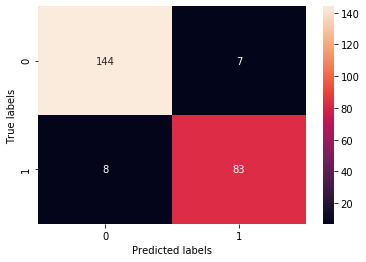

In [41]:
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, classification_report 
pred_hardvotingclf = voting.predict(X_test)
print(metrics.accuracy_score(y_test,pred_hardvotingclf))

confusion = confusion_matrix(y_test, pred_hardvotingclf)
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion, annot=True,fmt='d', ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')

print(classification_report(y_test,pred_hardvotingclf))

The F1 score and Recall is obtained

In [42]:
from sklearn.metrics import precision_recall_fscore_support as score

precision,recall,fscore,support=score(y_test,pred_hardvotingclf)

print ('Recall    : {}'.format(recall[0]))
print ('F1Score    : {}'.format(fscore[0]))

Recall    : 0.9536423841059603
F1Score    : 0.9504950495049505


In [43]:
Classification_Scores.update({'Hard voting Classifier':[metrics.accuracy_score(y_test,pred_hardvotingclf),recall[0],fscore[0]]})

# b) Voting Classifier - Soft

Soft voting is done with probability vector of each class summed and averaged

In [44]:
soft_voting = VotingClassifier(estimators=[('lr', logistic_clf), ('svc', svc_clf), ('kn', knn_clf)], voting = 'soft')

The train and test of the soft voting classifier is obtained

In [45]:
soft_voting.fit(X_train, y_train)
print('vot_clf Train: {0:.4f}'.format(soft_voting.score(X_train, y_train)))
print('vot_clf Test: {0:.4f}'.format(soft_voting.score(X_test, y_test)))

vot_clf Train: 0.9451
vot_clf Test: 0.9380


The confusion matrix of the soft voting classifier is printed

0.9380165289256198
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       151
           1       0.92      0.91      0.92        91

    accuracy                           0.94       242
   macro avg       0.93      0.93      0.93       242
weighted avg       0.94      0.94      0.94       242



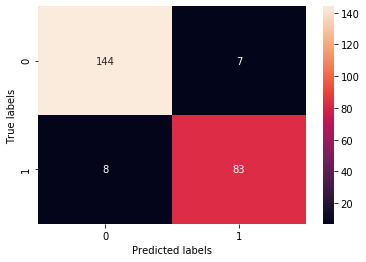

In [46]:
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, classification_report 
pred_softvotingclf = soft_voting.predict(X_test)
print(metrics.accuracy_score(y_test,pred_softvotingclf))

confusion = confusion_matrix(y_test, pred_softvotingclf)
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion, annot=True,fmt='d', ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')


print(classification_report(y_test,pred_softvotingclf))

The F1 score and Recall values are obtained

In [47]:
from sklearn.metrics import precision_recall_fscore_support as score

precision,recall,fscore,support=score(y_test,pred_softvotingclf)

print ('Recall    : {}'.format(recall[0]))
print ('F1Score    : {}'.format(fscore[0]))

Recall    : 0.9536423841059603
F1Score    : 0.9504950495049505


In [48]:
Classification_Scores.update({'Soft voting calssifier':[metrics.accuracy_score(y_test,pred_softvotingclf),recall[0],fscore[0]]})

# 2)Bagging

Bagging is an aggregation ensemble meta-algorithm designed to improve the stability and accuracy of algorithms. 

It helps to reduce overfitting. One main parameter passed is the bootstrap parameter.It uses sampling with replacement.

N_estimators and max_samples are parameters that control the number of decision trees and sample size used.


The bagging is done with KNN and decision Tree

## Bagging-Decision tree

Bagging is run with decision tree with n_estimator=500 , max_features=0.5

In [49]:
from sklearn.ensemble import BaggingClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
bag_clf = BaggingClassifier(DecisionTreeClassifier(),bootstrap=True,n_jobs=-1,random_state=0,max_features=0.5,n_estimators=500,max_samples=0.6)

bag_clf.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(bag_clf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(bag_clf.score(X_test, y_test)))

Accuracy on training set: 0.977
Accuracy on test set: 0.942


Cross validation score for the bagging classifier

In [50]:
scores = cross_val_score(bag_clf, X_train, y_train, cv = 10, scoring = 'accuracy' )
print("Cross-validation scores: {}".format(scores))

print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.93814433 0.95876289 0.88659794 0.96907216 0.96907216 0.91666667
 0.94791667 0.88541667 0.97916667 0.94791667]
Average cross-validation score: 0.94


Grid Search is done with max_samples, max_features and n_estimators to find the best parameters

In [51]:
param_grid = {'max_samples': [0.5,0.6,0.8],
             'max_features': [0.4,0.5,0.6],
             'n_estimators': [100,300,500]}

grid_search_bagclf = GridSearchCV(BaggingClassifier(random_state=0,bootstrap=True,n_jobs=-1), param_grid, cv=5, return_train_score=True)

grid_search_bagclf.fit(X_train, y_train)

print("Best parameters: {}".format(grid_search_bagclf.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_bagclf.best_score_))

Best parameters: {'max_features': 0.5, 'max_samples': 0.6, 'n_estimators': 500}
Best cross-validation score: 0.94


Confusion matrix is printed for the above classifier

0.9421487603305785
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       151
           1       0.92      0.92      0.92        91

    accuracy                           0.94       242
   macro avg       0.94      0.94      0.94       242
weighted avg       0.94      0.94      0.94       242



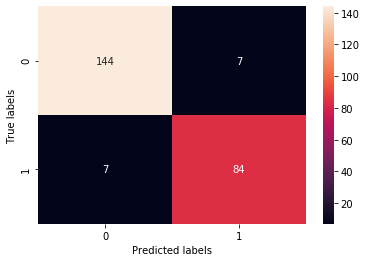

In [52]:
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, classification_report 
pred_bagclf = grid_search_bagclf.predict(X_test)
print(metrics.accuracy_score(y_test,pred_bagclf))

confusion = confusion_matrix(y_test, pred_bagclf)
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion, annot=True,fmt='d', ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')


print(classification_report(y_test,pred_bagclf))

The Recall and F1 score for the decision tree with bagging is obtained

In [53]:
from sklearn.metrics import precision_recall_fscore_support as score

precision,recall,fscore,support=score(y_test,pred_bagclf)

print ('Recall    : {}'.format(recall[0]))
print ('F1Score    : {}'.format(fscore[0]))

Recall    : 0.9536423841059603
F1Score    : 0.9536423841059603


In [54]:
Classification_Scores.update({'Bagging-Decision Tree Classifier':[metrics.accuracy_score(y_test,pred_bagclf),recall[0],fscore[0]]})

### Bagging - KNN 

The KNN model is run with neighbors = 4 with bagging

In [55]:
from sklearn.ensemble import BaggingClassifier

bagknn_clf = BaggingClassifier(KNeighborsClassifier(n_neighbors=4), bootstrap=True, n_jobs=-1, random_state=0)

bagknn_clf.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(bagknn_clf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(bagknn_clf.score(X_test, y_test)))

Accuracy on training set: 0.945
Accuracy on test set: 0.938


The cross validation score is calculated with cv=5

In [56]:
scores = cross_val_score(bagknn_clf, X_train, y_train, cv = 5, scoring = 'accuracy' )
print("Cross-validation scores: {}".format(scores))

print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.93264249 0.89119171 0.94818653 0.9119171  0.94818653]
Average cross-validation score: 0.93


Grid search is used to find the best parameters for max_sample, max_features and n_estimators 

In [57]:
param_grid = {'max_samples': [0.5,0.6],
             'max_features': [0.4,0.5],
             'n_estimators': [100,500]}

grid_search_bagclfknn = GridSearchCV(BaggingClassifier(KNeighborsClassifier(n_neighbors=4),random_state=0,bootstrap=True,n_jobs=-1), param_grid, cv=5, return_train_score=True)

grid_search_bagclfknn.fit(X_train, y_train)

print("Best parameters: {}".format(grid_search_bagclf.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_bagclf.best_score_))

Best parameters: {'max_features': 0.5, 'max_samples': 0.6, 'n_estimators': 500}
Best cross-validation score: 0.94


Confusion matrix is printed 

0.9380165289256198
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       151
           1       0.92      0.91      0.92        91

    accuracy                           0.94       242
   macro avg       0.93      0.93      0.93       242
weighted avg       0.94      0.94      0.94       242



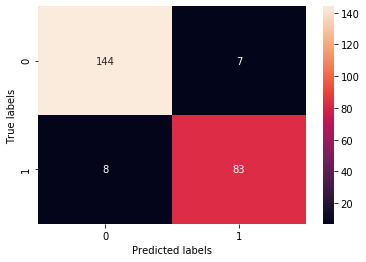

In [58]:

import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, classification_report 
pred_bagknn_clf = grid_search_bagclfknn.predict(X_test)
print(metrics.accuracy_score(y_test,pred_bagknn_clf))

confusion = confusion_matrix(y_test, pred_bagknn_clf)
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion, annot=True,fmt='d', ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
#ax.xaxis.set_ticklabels(['Attrition', 'No-Attrition'])
#ax.yaxis.set_ticklabels(['Attrition', 'No-Attrition'])

print(classification_report(y_test,pred_bagknn_clf))

The Recall and F1 score is calculated 

In [59]:
from sklearn.metrics import precision_recall_fscore_support as score

precision,recall,fscore,support=score(y_test,pred_bagknn_clf)

print ('Recall    : {}'.format(recall[0]))
print ('F1Score    : {}'.format(fscore[0]))

Recall    : 0.9536423841059603
F1Score    : 0.9504950495049505


In [60]:
Classification_Scores.update({'Bagging-KNN Classifier':[metrics.accuracy_score(y_test,pred_bagknn_clf),recall[0],fscore[0]]})

# 3)Pasting 

Pasting is an aggregation ensemble meta-algorithm designed to improve the stability and accuracy of algorithms. It helps to reduce overfitting. One main parameter passed is the bootstrap parameter which is set to false.It uses sampling without replacement.

N_estimators and max_samples are parameters that control the number of decision trees and sample size used.

Pasting is done on Decision Tree and KNN models

### Pasting - Decision Tree

Decision tree is run with bootstrap=false for pasting

In [61]:
from sklearn.ensemble import BaggingClassifier

pasteknn_clf = BaggingClassifier(DecisionTreeClassifier(random_state = 0, max_depth= 2), bootstrap=False, n_jobs=-1, random_state=0,n_estimators=150,max_samples=100)

pasteknn_clf.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(bagknn_clf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(bagknn_clf.score(X_test, y_test)))

Accuracy on training set: 0.945
Accuracy on test set: 0.938


Cross validation is done on the model with cv=10

In [62]:
scores = cross_val_score(bagknn_clf, X_train, y_train, cv = 10, scoring = 'accuracy' )
print("Cross-validation scores: {}".format(scores))

print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.91752577 0.95876289 0.87628866 0.89690722 0.97938144 0.91666667
 0.91666667 0.88541667 0.95833333 0.9375    ]
Average cross-validation score: 0.92


The gridsearch is used to find best parameters for max_samples, max_features and n_estimators for the decision tree 

In [63]:
param_grid = {'max_samples': [0.5,0.6],
             'max_features': [0.4,0.5],
             'n_estimators': [100,500]}

grid_search_pasteknnclf = GridSearchCV(BaggingClassifier(DecisionTreeClassifier(max_depth= 2),random_state=0,bootstrap=False,n_jobs=-1), param_grid, cv=5, return_train_score=True)

grid_search_pasteknnclf.fit(X_train, y_train)

print("Best parameters: {}".format(grid_search_pasteknnclf.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_pasteknnclf.best_score_))

Best parameters: {'max_features': 0.4, 'max_samples': 0.5, 'n_estimators': 500}
Best cross-validation score: 0.95


Confusion matrix is printed with the model outcome

0.9380165289256198
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       151
           1       0.92      0.91      0.92        91

    accuracy                           0.94       242
   macro avg       0.93      0.93      0.93       242
weighted avg       0.94      0.94      0.94       242



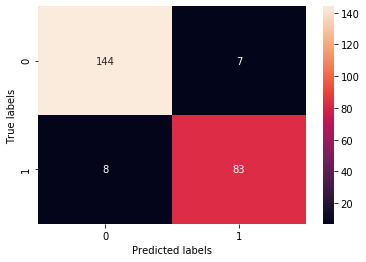

In [64]:
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, classification_report 
pred_pasteclf = pasteknn_clf.predict(X_test)
print(metrics.accuracy_score(y_test,pred_pasteclf))

confusion = confusion_matrix(y_test, pred_pasteclf)
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion, annot=True, fmt='d',ax = ax); #annot=True to annotate cells

# labels
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
print(classification_report(y_test,pred_pasteclf))

The recall and F1 score of the model is printed

In [65]:
from sklearn.metrics import precision_recall_fscore_support as score

precision,recall,fscore,support=score(y_test,pred_pasteclf)

print ('Recall    : {}'.format(recall[0]))
print ('F1Score    : {}'.format(fscore[0]))

Recall    : 0.9536423841059603
F1Score    : 0.9504950495049505


In [66]:
Classification_Scores.update({'Pasting-Decision Tree':[metrics.accuracy_score(y_test,pred_pasteclf),recall[0],fscore[0]]})

### Pasting - KNN

KNN classfier with Pasting is modelled with bootstrap=false

In [67]:
from sklearn.ensemble import BaggingClassifier

pasteknn_clf = BaggingClassifier(KNeighborsClassifier(n_neighbors=4), bootstrap=False, n_jobs=-1, random_state=0)

pasteknn_clf.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(bagknn_clf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(bagknn_clf.score(X_test, y_test)))

Accuracy on training set: 0.945
Accuracy on test set: 0.938


Cross validation score is printed for the model

In [68]:
scores = cross_val_score(bagknn_clf, X_train, y_train, cv = 5, scoring = 'accuracy' )
print("Cross-validation scores: {}".format(scores))

print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.93264249 0.89119171 0.94818653 0.9119171  0.94818653]
Average cross-validation score: 0.93


Gridsearch is used to find the best parameters for max_samples, max_features and n_estimators are found

In [69]:
param_grid = {'max_samples': [0.5,0.6],
             'max_features': [0.4,0.5],
             'n_estimators': [100,500]}

grid_search_pasteknnclf = GridSearchCV(BaggingClassifier(KNeighborsClassifier(),random_state=0,bootstrap=False,n_jobs=-1), param_grid, cv=5, return_train_score=True)

grid_search_pasteknnclf.fit(X_train, y_train)

print("Best parameters: {}".format(grid_search_pasteknnclf.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_pasteknnclf.best_score_))

Best parameters: {'max_features': 0.4, 'max_samples': 0.5, 'n_estimators': 500}
Best cross-validation score: 0.94


Confusion matrix is printed for the model

0.9380165289256198
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       151
           1       0.91      0.92      0.92        91

    accuracy                           0.94       242
   macro avg       0.93      0.94      0.93       242
weighted avg       0.94      0.94      0.94       242



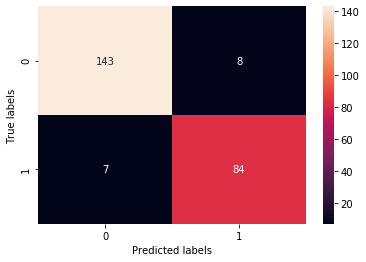

In [70]:
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, classification_report 
pred_pasteclf = pasteknn_clf.predict(X_test)
print(metrics.accuracy_score(y_test,pred_pasteclf))

confusion = confusion_matrix(y_test, pred_pasteclf)
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion, annot=True,fmt='d', ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')

print(classification_report(y_test,pred_pasteclf))

Recall and F1 score are printed

In [71]:
from sklearn.metrics import precision_recall_fscore_support as score

precision,recall,fscore,support=score(y_test,pred_pasteclf)

print ('Recall    : {}'.format(recall[0]))
print ('F1Score    : {}'.format(fscore[0]))

Recall    : 0.9470198675496688
F1Score    : 0.9501661129568105


In [72]:
Classification_Scores.update({'Pasting-KNN Classifier':[metrics.accuracy_score(y_test,pred_pasteclf),recall[0],fscore[0]]})

## AdaBoosting

Adaboost turns multiple weak classifiers into a strong classifier. The important parameters used are n_estimators and learning_rate.

Learning rate shrinks the contribution of each classifier by learning_rate chosen.

### Adaboost with Decision tree

The best parameter in learning_rate and n_estimators are identified 

In [73]:
from sklearn.ensemble import AdaBoostClassifier
train_score_array = []
test_score_array = []
best_score=0


for n in range(1,10):
    for learning_rate in [0.001,0.01]:
        for n_estimators in [50,100]:
            dtree_reg=DecisionTreeClassifier(max_depth=n)
            ada_reg_dtree = AdaBoostClassifier(dtree_reg, n_estimators=n_estimators,learning_rate=learning_rate,random_state=0)
            ada_reg_dtree.fit(X_train, y_train)
            train_score_array.append(ada_reg_dtree.score(X_train, y_train))
            test_score_array.append(ada_reg_dtree.score(X_test, y_test))
            score=ada_reg_dtree.score(X_test, y_test)
            if(score>best_score):
                best_score=score
                best_parameters = {'learning_rate': learning_rate, 'max_depth': n,'n_estimators':n_estimators}

print(best_parameters)

{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}


The train and test score for the decision tree model with max_depth =5 and n_estimator=50, learning_rate=0.01

In [74]:
from sklearn.ensemble import AdaBoostClassifier

dt_reg = DecisionTreeClassifier(max_depth=5,random_state=0)
ada_reg_dt = AdaBoostClassifier(dt_reg, n_estimators=50,learning_rate=0.01,random_state=0)

ada_reg_dt.fit(X_train,y_train)

y_pred=ada_reg_dt.predict(X_test)

print('Train score: {:.4f} %'.format(ada_reg_dt.score(X_train, y_train)*100))
print('Test score: {:.4f} %'.format(ada_reg_dt.score(X_test, y_test)*100))

Train score: 98.5492 %
Test score: 94.6281 %


Confusion matrix is printed

0.9462809917355371
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       151
           1       0.91      0.95      0.93        91

    accuracy                           0.95       242
   macro avg       0.94      0.95      0.94       242
weighted avg       0.95      0.95      0.95       242



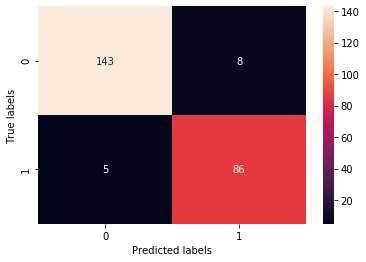

In [75]:
pred_ada = ada_reg_dt.predict(X_test)
print(metrics.accuracy_score(y_test,pred_ada))

confusion = confusion_matrix(y_test, pred_ada)
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion, annot=True,fmt='d', ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')

print(classification_report(y_test,pred_ada))

Recall and F1 score is calculated

In [76]:
from sklearn.metrics import precision_recall_fscore_support as score

precision,recall,fscore,support=score(y_test,pred_ada)

print ('Recall    : {}'.format(recall[0]))
print ('F1Score    : {}'.format(fscore[0]))

Recall    : 0.9470198675496688
F1Score    : 0.9565217391304347


In [77]:
Classification_Scores.update({'Adaboosting-Decision Tree':[metrics.accuracy_score(y_test,pred_ada),recall[0],fscore[0]]})

### Adaboost with SVC Poly

Kernel =poly, n_estimators=200 and learning_rate=0.1 are used for SVC poly model with adaboost

In [78]:
from sklearn.svm import SVC
svc_clf=SVC(C=1,gamma=0.1, kernel='poly',probability=True)
ada_clf_svc = AdaBoostClassifier(svc_clf, n_estimators=200,learning_rate=0.1,random_state=0)
ada_clf_svc.fit(X_train, y_train)

y_pred=ada_clf_svc.predict(X_test)
print('Train score: {:.4f} %'.format(ada_clf_svc.score(X_train, y_train)*100))
print('Test score: {:.4f} %'.format(ada_clf_svc.score(X_test, y_test)*100))


Train score: 93.8860 %
Test score: 90.9091 %


Confusion matrix is printed for the above model

0.9090909090909091
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       151
           1       0.91      0.85      0.87        91

    accuracy                           0.91       242
   macro avg       0.91      0.90      0.90       242
weighted avg       0.91      0.91      0.91       242



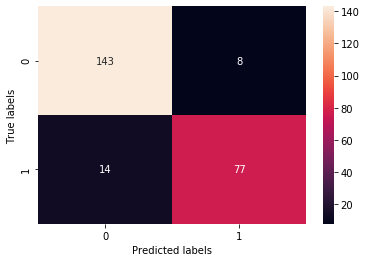

In [79]:
pred_adasvc = ada_clf_svc.predict(X_test)
print(metrics.accuracy_score(y_test,pred_adasvc))

confusion = confusion_matrix(y_test, pred_adasvc)
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion, annot=True, fmt='d',ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')

print(classification_report(y_test,pred_adasvc))

In [80]:
from sklearn.metrics import precision_recall_fscore_support as score

precision,recall,fscore,support=score(y_test,pred_adasvc)

print ('Recall    : {}'.format(recall[0]))
print ('F1Score    : {}'.format(fscore[0]))

Recall    : 0.9470198675496688
F1Score    : 0.9285714285714285


In [81]:
Classification_Scores.update({'Adaboosting-SVC Poly Classifier':[metrics.accuracy_score(y_test,pred_adasvc),recall[0],fscore[0]]})

## Gradient Boosting

Gradient boosting is a technique which minimizes the overall prediction error. The key idea is to set the target outcomes for the next best model in order to minimize the error. Gradient boosting model is primarily used with decision tree.

The key parameters used are n_estimators and learning_rate

In [82]:
from  sklearn.ensemble import GradientBoostingClassifier

gradient_boosting = GradientBoostingClassifier(max_depth=2, random_state=0)
param_grid={'n_estimators':[50,100,150],'learning_rate':[0.5,1]}
grid7=GridSearchCV(gradient_boosting,param_grid,cv=5,return_train_score=True)
grid7.fit(X_train, y_train)
train7=grid7.cv_results_['mean_train_score']
print("Best Parameters: {}".format(grid7.best_params_))
print("Train score: {0:.3f}".format(train7.mean()))
print("Test score: {0:.3f}".format(grid7.score(X_test,y_test)))

Best Parameters: {'learning_rate': 0.5, 'n_estimators': 50}
Train score: 0.994
Test score: 0.909


The best params learning_rate=0.5 and n_estimators:20 are used with max_depth=2 for decision tree

In [83]:
grad_clf = GradientBoostingClassifier(max_depth=2, n_estimators=50,learning_rate=0.5,random_state=0)
grad_clf.fit(X_train, y_train)

y_pred=grad_clf.predict(X_test)


In [84]:
print('Train score: {:.4f} %'.format(grad_clf.score(X_train, y_train)*100))
print('Test score: {:.4f} %'.format(grad_clf.score(X_test, y_test)*100))

Train score: 97.9275 %
Test score: 90.9091 %


Confusion Matrix is printed for the model 

0.9090909090909091
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       151
           1       0.91      0.85      0.87        91

    accuracy                           0.91       242
   macro avg       0.91      0.90      0.90       242
weighted avg       0.91      0.91      0.91       242



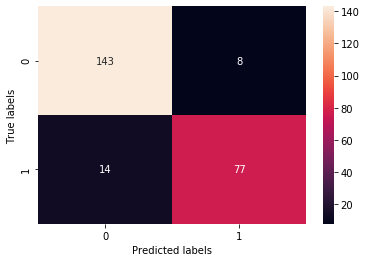

In [85]:
grad = grad_clf.predict(X_test)
print(metrics.accuracy_score(y_test,grad))

confusion = confusion_matrix(y_test, grad)
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion, annot=True, fmt='d',ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')


print(classification_report(y_test,grad))

In [86]:
from sklearn.metrics import precision_recall_fscore_support as score

precision,recall,fscore,support=score(y_test,grad)

print ('Recall    : {}'.format(recall[0]))
print ('F1Score    : {}'.format(fscore[0]))

Recall    : 0.9470198675496688
F1Score    : 0.9285714285714285


In [87]:
Classification_Scores.update({'Gradient boosting':[metrics.accuracy_score(y_test,grad),recall[0],fscore[0]]})

## Random Forest

The random forest is a classifier consisting of many decisions trees

In [88]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.997
Accuracy on test set: 0.938


Confusion Matrix is generated

0.9380165289256198
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       151
           1       0.92      0.91      0.92        91

    accuracy                           0.94       242
   macro avg       0.93      0.93      0.93       242
weighted avg       0.94      0.94      0.94       242



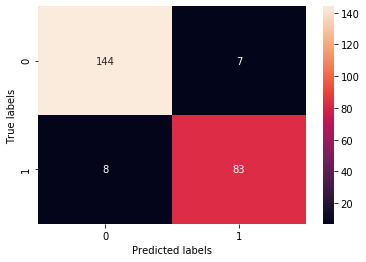

In [89]:
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, classification_report 
pred_forestclf = forest.predict(X_test)
print(metrics.accuracy_score(y_test,pred_forestclf))

confusion = confusion_matrix(y_test, pred_forestclf)
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion, annot=True, fmt='d',ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')

print(classification_report(y_test,pred_forestclf))

The recall and F1 score are printed

In [90]:
from sklearn.metrics import precision_recall_fscore_support as score

precision,recall,fscore,support=score(y_test,pred_forestclf)

print ('Recall    : {}'.format(recall[0]))
print ('F1Score    : {}'.format(fscore[0]))

Recall    : 0.9536423841059603
F1Score    : 0.9504950495049505


In [91]:
Classification_Scores.update({'Random Forest':[metrics.accuracy_score(y_test,pred_forestclf),recall[0],fscore[0]]})

In [92]:
forest.feature_importances_

array([0.0629187 , 0.06364299, 0.02162273, 0.01250533, 0.02042624,
       0.00529865, 0.00404272, 0.00353806, 0.00871052, 0.00425258,
       0.04741042, 0.02148329, 0.00285393, 0.00668045, 0.00122707,
       0.00173329, 0.00176495, 0.00229307, 0.00082871, 0.00435428,
       0.0019443 , 0.00645337, 0.00466284, 0.00269751, 0.00331846,
       0.00221829, 0.00220869, 0.00113739, 0.00128925, 0.00165149,
       0.00361966, 0.0095361 , 0.00724962, 0.00976158, 0.00791325,
       0.01682447, 0.00158011, 0.00061867, 0.00340788, 0.00454487,
       0.28132018, 0.32447714, 0.00397691])

## PCA  

PCA is statistical technique using dimensionality reduction with sole basis that large number of features add to high dimensionality which essentially leads to overfitting.

PCA thus reduces the number of feautures taken into consideration.

In [93]:
from sklearn.decomposition import PCA

# intialize pca and logistic regression model
pca = PCA(n_components=0.95)

In [94]:
X_train_pca= pca.fit_transform(X_train)  
X_test_pca = pca.transform(X_test)

print(X_train_pca.shape)
print(y_train.shape)
print(X_test_pca.shape)
print(y_test.shape)

(965, 24)
(965,)
(242, 24)
(242,)


PCA is run on all the models 

### KNN with PCA

KNN classifier is modeled with cv=5 and the cross val score is calculated

GridSearch is used to find the best neighbor that can be used

Best parameters: {'n_neighbors': 5}
Best cross-validation score: 0.93


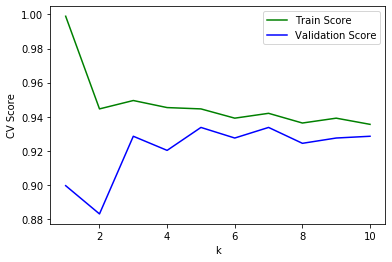

In [95]:
k_range = list(range(1, 11))

param_grid = dict(n_neighbors=k_range)

grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, return_train_score=True)

grid_search_knn.fit(X_train_pca, y_train)

df = pd.DataFrame(grid_search_knn.cv_results_)
%matplotlib inline
x_axis = range(1,11)
plt.plot(x_axis, df.mean_train_score, c = 'g', label = 'Train Score')
plt.plot(x_axis, df.mean_test_score, c = 'b', label = 'Validation Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('CV Score')

print("Best parameters: {}".format(grid_search_knn.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_knn.best_score_))

Neighbour=5 is taken for the KNN classifier

In [96]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_pca, y_train)
print('Train score on best parameters {:.4f}'.format(knn.score(X_train_pca,y_train)))
print('Test score on best parameters {:.4f}'.format(knn.score(X_test_pca,y_test)))

Train score on best parameters 0.9461
Test score on best parameters 0.9380


Cross validation score for the KNN is found

In [97]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
knn_grid = KNeighborsClassifier(5)

scores = cross_val_score(knn_grid, X_train_pca, y_train, cv =5, scoring = 'accuracy')
print("Cross-validation scores: {}".format(scores))

print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.94818653 0.91709845 0.94300518 0.92227979 0.93782383]
Average cross-validation score: 0.93


Confusion Matrix is printed for the model

0.9380165289256198
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       151
           1       0.91      0.92      0.92        91

    accuracy                           0.94       242
   macro avg       0.93      0.94      0.93       242
weighted avg       0.94      0.94      0.94       242



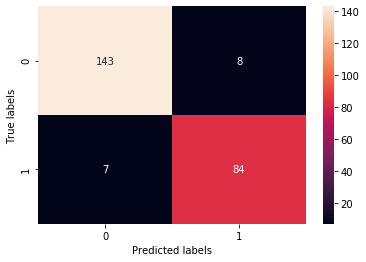

In [98]:
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, classification_report

 
pred_knn = knn.predict(X_test_pca)
print(metrics.accuracy_score(y_test,pred_knn))

confusion = confusion_matrix(y_test, pred_knn)
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, classification_report 
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion, annot=True, fmt='d',ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')

print(classification_report(y_test,pred_knn))

Recall and F1 score is printed

In [99]:
from sklearn.metrics import precision_recall_fscore_support as score

precision,recall,fscore,support=score(y_test,pred_knn)

print ('Recall    : {}'.format(recall[0]))
print ('F1Score    : {}'.format(fscore[0]))

Recall    : 0.9470198675496688
F1Score    : 0.9501661129568105


In [100]:
Classification_Scores.update({'KNN Classification with PCA':[metrics.accuracy_score(y_test,pred_knn),recall[0],fscore[0]]})

### Logistic reg after PCA

Logistic regression is run after the PCA is done on the dataset

Best score: 0.94
Best parameters: {'C': 0.01, 'penalty': 'l2'}


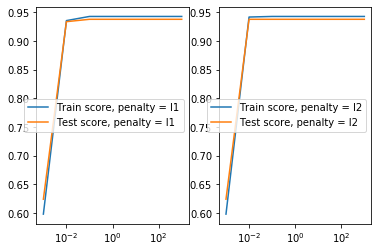

In [101]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

from sklearn.linear_model import LogisticRegression

c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l1 = []
train_score_l2 = []
valid_score_l1 = []
valid_score_l2 = []

best_score = 0
l1 = 'l1'
l2 = 'l2'

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c,solver='liblinear')
    log_l2 = LogisticRegression(penalty = 'l2', C = c,solver='lbfgs')
    
    log_l1.fit(X_train_pca, y_train)
    log_l2.fit(X_train_pca, y_train)
    
    train_score_l1.append(log_l1.score(X_train_pca, y_train))
    train_score_l2.append(log_l2.score(X_train_pca, y_train))
    
    score = log_l1.score(X_test_pca, y_test)
    valid_score_l1.append(score)
    if score > best_score:
            best_score = score
            best_parameters = {'C': c , 'penalty': l1}
            best_C = c
            best_Penalty = 'l1'
    
    score = log_l2.score(X_test_pca, y_test)
    valid_score_l2.append(score)
    if score > best_score:
            best_score = score
            best_parameters = {'C': c , 'penalty' : l2}
            best_C = c
            best_Penalty = 'l2'
    
plt.subplot(1,2,1)
plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, valid_score_l1, label = 'Test score, penalty = l1')
plt.xscale('log')
plt.legend()
plt.subplot(1,2,2)
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, valid_score_l2, label = 'Test score, penalty = l2')
plt.xscale('log')
plt.legend()

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Train and test score are calculated 

In [102]:
lg = LogisticRegression(C=0.01,penalty='l2').fit(X_train_pca, y_train)
print('Train score on best parameters for Logistic Regression model {:.4f}'.format(lg.score(X_train_pca,y_train)))
print('Test score on best parameters for Logistic Regression model {:.4f}'.format(lg.score(X_test_pca,y_test)))

Train score on best parameters for Logistic Regression model 0.9420
Test score on best parameters for Logistic Regression model 0.9380


Logistic regression is modelled with penalty L2 and C=0.01

In [103]:
log_grid = LogisticRegression(penalty = 'l2', C = 0.01)

scores = cross_val_score(log_grid, X_train_pca, y_train, cv =5, scoring = 'accuracy')
print("Cross-validation scores: {}".format(scores))

print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.96373057 0.92227979 0.93782383 0.9119171  0.97409326]
Average cross-validation score: 0.94


0.9380165289256198
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       151
           1       0.92      0.91      0.92        91

    accuracy                           0.94       242
   macro avg       0.93      0.93      0.93       242
weighted avg       0.94      0.94      0.94       242



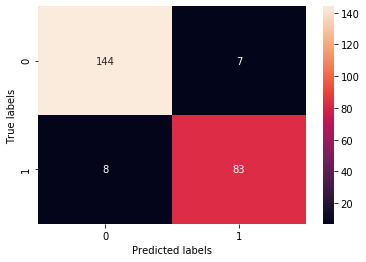

In [104]:
pred_log = lg.predict(X_test_pca)
print(metrics.accuracy_score(y_test,pred_log))

confusion = confusion_matrix(y_test, pred_log)
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion, annot=True,fmt='d', ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')

print(classification_report(y_test,pred_log))

In [105]:
from sklearn.metrics import precision_recall_fscore_support as score

precision,recall,fscore,support=score(y_test,pred_log)

print ('Recall    : {}'.format(recall[0]))
print ('F1Score    : {}'.format(fscore[0]))

Recall    : 0.9536423841059603
F1Score    : 0.9504950495049505


In [106]:
Classification_Scores.update({'Logistic Regression with PCA':[metrics.accuracy_score(y_test,pred_log),recall[0],fscore[0]]})

### Linear SVC with PCA

Linear SVC is modeled with with grid search for best param for C

Best parameters: {'C': 0.01}
Best cross-validation score: 0.94


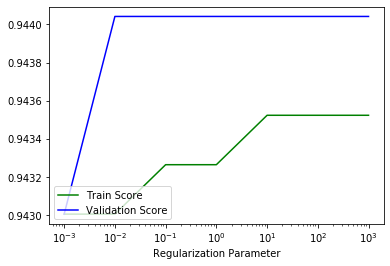

In [107]:
from sklearn.svm import LinearSVC
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_search_lsvc = GridSearchCV(LinearSVC(max_iter=100000000), param_grid, cv=5, return_train_score=True)

grid_search_lsvc.fit(X_train_pca, y_train)

df = pd.DataFrame(grid_search_lsvc.cv_results_)
%matplotlib inline
x_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
plt.plot(x_range, df.mean_train_score, c = 'g', label = 'Train Score')
plt.plot(x_range, df.mean_test_score, c = 'b', label = 'Validation Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel('Regularization Parameter')

print("Best parameters: {}".format(grid_search_lsvc.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_lsvc.best_score_))

The train and test score are calculated for this model

In [108]:
from sklearn.svm import SVC
clf1 = SVC(kernel='linear', C=0.01).fit(X_train_pca, y_train)
print('Train score on best parameters for LinearSVC - {:.4f}'.format(clf1.score(X_train_pca, y_train)))
print('Test score on best parameters ffor LinearSVC - {:.4f}'.format(clf1.score(X_test_pca,y_test)))

Train score on best parameters for LinearSVC - 0.9440
Test score on best parameters ffor LinearSVC - 0.9380


In [109]:
linear_svc_grid = LinearSVC(C = 0.01, max_iter=10000)
scores = cross_val_score(linear_svc_grid, X_train_pca, y_train, cv = 5, scoring = 'accuracy')
print("Cross-validation scores: {}".format(scores))

print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.96373057 0.92227979 0.94300518 0.91709845 0.97409326]
Average cross-validation score: 0.94


Confusion Matrix is printed

0.9380165289256198
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       151
           1       0.92      0.91      0.92        91

    accuracy                           0.94       242
   macro avg       0.93      0.93      0.93       242
weighted avg       0.94      0.94      0.94       242



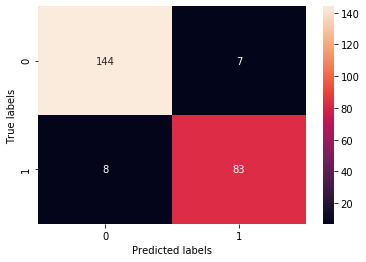

In [110]:
pred_linear_svc = clf1.predict(X_test_pca)
print(metrics.accuracy_score(y_test,pred_linear_svc))

confusion = confusion_matrix(y_test, pred_linear_svc)
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion, annot=True,fmt='d', ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')

print(classification_report(y_test,pred_linear_svc)) 

RECALL and F1 score are printed

In [111]:
from sklearn.metrics import precision_recall_fscore_support as score

precision,recall,fscore,support=score(y_test,pred_linear_svc)

print ('Recall    : {}'.format(recall[0]))
print ('F1Score    : {}'.format(fscore[0]))

Recall    : 0.9536423841059603
F1Score    : 0.9504950495049505


In [112]:
Classification_Scores.update({'Linear SVC with PCA':[metrics.accuracy_score(y_test,pred_linear_svc),recall[0],fscore[0]]})

### SVC-rbf pca

Gridsearch is used to find the best param of gamma and C

In [113]:
param_grid = {'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
             'C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search_svcr = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5, return_train_score=True)

grid_search_svcr.fit(X_train_pca, y_train)

df = pd.DataFrame(grid_search_svcr.cv_results_)
print("Best parameters: {}".format(grid_search_svcr.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_svcr.best_score_))


Best parameters: {'C': 0.1, 'gamma': 0.1}
Best cross-validation score: 0.95


The best param of C=0.1 and gamma=0.1 are used

In [114]:
clf2 = SVC(kernel='rbf', C=0.1,gamma=0.1).fit(X_train_pca, y_train)
print('Train score on best parameters for LinearSVC - {:.4f}'.format(clf1.score(X_train_pca, y_train)))
print('Test score on best parameters ffor LinearSVC - {:.4f}'.format(clf1.score(X_test_pca,y_test)))

Train score on best parameters for LinearSVC - 0.9440
Test score on best parameters ffor LinearSVC - 0.9380


In [115]:
from sklearn.model_selection import cross_val_score
svc_rbf_grid = SVC(kernel='rbf', gamma = 0.1, C = 0.1)

scores = cross_val_score(svc_rbf_grid, X_train_pca, y_train, cv =10, scoring = 'accuracy')
print("Cross-validation scores: {}".format(scores))

print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.94845361 0.96907216 0.89690722 0.95876289 0.96907216 0.91666667
 0.95833333 0.875      0.98958333 0.95833333]
Average cross-validation score: 0.94


Confusion Matrix is printed

0.9380165289256198
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       151
           1       0.92      0.91      0.92        91

    accuracy                           0.94       242
   macro avg       0.93      0.93      0.93       242
weighted avg       0.94      0.94      0.94       242



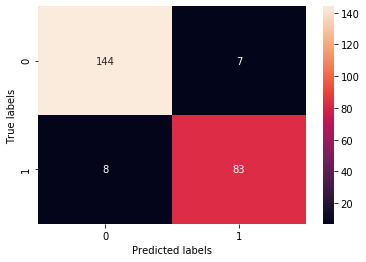

In [116]:
pred_rbf = clf2.predict(X_test_pca)
print(metrics.accuracy_score(y_test,pred_rbf))

confusion = confusion_matrix(y_test, pred_rbf)
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion, annot=True,fmt='d', ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')

print(classification_report(y_test,pred_rbf))

In [117]:
from sklearn.metrics import precision_recall_fscore_support as score

precision,recall,fscore,support=score(y_test,pred_rbf)

print ('Recall    : {}'.format(recall[0]))
print ('F1Score    : {}'.format(fscore[0]))

Recall    : 0.9536423841059603
F1Score    : 0.9504950495049505


In [118]:
Classification_Scores.update({'SVC-rbf with PCA':[metrics.accuracy_score(y_test,pred_rbf),recall[0],fscore[0]]})

### SVC Poly PCA

SVC Poly is modeled with grid dearch for best param - gamma, C, degree

In [119]:
param_grid = {'gamma': [0.01,0.1],
             'C': [0.01, 0.1, 1,10],
             'degree': [1,2,3,4,5]}

grid_search_svcp = GridSearchCV(SVC(kernel='poly'), param_grid, cv=5, return_train_score=True)

grid_search_svcp.fit(X_train_pca, y_train)

print("Best parameters: {}".format(grid_search_svcp.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_svcp.best_score_))

Best parameters: {'C': 0.1, 'degree': 1, 'gamma': 0.1}
Best cross-validation score: 0.94


Train and Test score of the linear SVC 

In [120]:
clf3 = SVC(kernel='rbf', C=0.1,gamma=0.1,degree=1).fit(X_train_pca, y_train)
print('Train score on best parameters for LinearSVC - {:.4f}'.format(clf1.score(X_train_pca, y_train)))
print('Test score on best parameters ffor LinearSVC - {:.4f}'.format(clf1.score(X_test_pca,y_test)))

Train score on best parameters for LinearSVC - 0.9440
Test score on best parameters ffor LinearSVC - 0.9380


In [121]:
svc_poly_grid = SVC(kernel='poly',degree = 1, C=0.01, gamma=1)

scores = cross_val_score(svc_poly_grid, X_train_pca, y_train, cv =5, scoring = 'accuracy')
print("Cross-validation scores: {}".format(scores))

print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.96373057 0.92227979 0.94300518 0.91709845 0.97409326]
Average cross-validation score: 0.94


Confusion Matrix 

0.9380165289256198
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       151
           1       0.92      0.91      0.92        91

    accuracy                           0.94       242
   macro avg       0.93      0.93      0.93       242
weighted avg       0.94      0.94      0.94       242



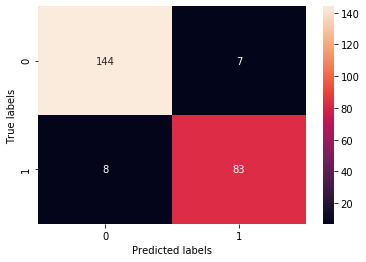

In [122]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

pred_poly = clf3.predict(X_test_pca)
print(metrics.accuracy_score(y_test,pred_poly))

confusion = confusion_matrix(y_test, pred_poly)

import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion, annot=True,fmt='d', ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')

print(classification_report(y_test,pred_poly))

Recall and F1 score are printed

In [123]:
from sklearn.metrics import precision_recall_fscore_support as score

precision,recall,fscore,support=score(y_test,pred_poly)

print ('Recall    : {}'.format(recall[0]))
print ('F1Score    : {}'.format(fscore[0]))

Recall    : 0.9536423841059603
F1Score    : 0.9504950495049505


In [124]:
Classification_Scores.update({'SVC-poly with PCA':[metrics.accuracy_score(y_test,pred_poly),recall[0],fscore[0]]})

### SVC rbf and linear with PCA

SVC RBF is modelled with gridsearch for selecting the best params for C, gamma

In [125]:
#using Kernel SVM
from sklearn.svm import SVC 
KernelSVC = SVC(max_iter=10000000)
kernelSVC_params = {'C':[0.001, 0.01, 0.1, 1],'gamma':[1,0.1,0.001], 'kernel':['rbf','linear']}

In [126]:
# Using Grid search to find the best parameters and fitting the model
KernelSVC_clf = GridSearchCV(KernelSVC, kernelSVC_params,cv=5)
KernelSVC_clf.fit(X_train_pca,y_train)
print('Train score on best parameters for LinearSVC - {:.4f}'.format(clf1.score(X_train_pca, y_train)))
print('Test score on best parameters ffor LinearSVC - {:.4f}'.format(clf1.score(X_test_pca,y_test)))

Train score on best parameters for LinearSVC - 0.9440
Test score on best parameters ffor LinearSVC - 0.9380


In [127]:
#finding the best paramrter
KernelSVC_clf.best_params_

{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}

CONFUSION MATRIX

0.9380165289256198
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       151
           1       0.92      0.91      0.92        91

    accuracy                           0.94       242
   macro avg       0.93      0.93      0.93       242
weighted avg       0.94      0.94      0.94       242



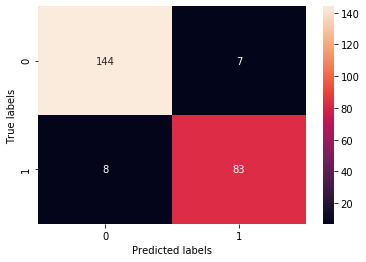

In [128]:
pred_ker_svc = KernelSVC_clf.predict(X_test_pca)
print(metrics.accuracy_score(y_test,pred_ker_svc))

confusion = confusion_matrix(y_test, pred_ker_svc)
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion, annot=True,fmt='d', ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')


print(classification_report(y_test,pred_ker_svc))

In [129]:
from sklearn.metrics import precision_recall_fscore_support as score

precision,recall,fscore,support=score(y_test,pred_ker_svc)

print ('Recall    : {}'.format(recall[0]))
print ('F1Score    : {}'.format(fscore[0]))

Recall    : 0.9536423841059603
F1Score    : 0.9504950495049505


In [130]:
Classification_Scores.update({'SVC-linear with PCA':[metrics.accuracy_score(y_test,pred_ker_svc),recall[0],fscore[0]]})

### Decision Tree PCA

Decision tree is modeled after PCA on the dataset with grid search for best param of max_depth and min_sample_leaf

In [131]:
from sklearn.tree import DecisionTreeClassifier

param_grid = {'criterion': ['gini','entropy'],
             'max_depth': [1,2,3,4,5,6,7,8,9,10],
             'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10]}

grid_search_dtree = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid, cv=5, return_train_score=True)

grid_search_dtree.fit(X_train_pca, y_train)

print("Best parameters: {}".format(grid_search_dtree.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_dtree.best_score_))

Best parameters: {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1}
Best cross-validation score: 0.93


In [132]:
dtree = DecisionTreeClassifier(max_depth=1,min_samples_leaf=1,criterion='gini')

dtree.fit(X_train_pca, y_train)
print("Accuracy on training set: {:.3f}".format(dtree.score(X_train_pca, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test_pca, y_test)))

Accuracy on training set: 0.940
Accuracy on test set: 0.934


Cross validations score is obtained

In [133]:
dtree_cv = DecisionTreeClassifier()
scores = cross_val_score(dtree_cv, X_train_pca, y_train, cv = 5, scoring = 'accuracy' )
print("Cross-validation scores: {}".format(scores))

print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.88601036 0.86528497 0.90673575 0.87564767 0.92227979]
Average cross-validation score: 0.89


CONFUSION MATRIX

0.9338842975206612
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       151
           1       0.90      0.92      0.91        91

    accuracy                           0.93       242
   macro avg       0.93      0.93      0.93       242
weighted avg       0.93      0.93      0.93       242



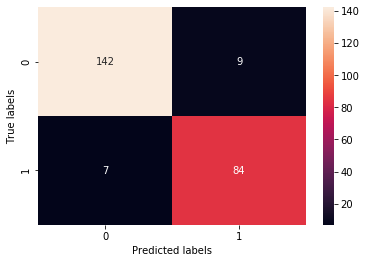

In [134]:
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, classification_report 
pred_tree = grid_search_dtree.predict(X_test_pca)
print(metrics.accuracy_score(y_test,pred_tree))

confusion = confusion_matrix(y_test, pred_tree)
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion, annot=True,fmt='d', ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')

print(classification_report(y_test,pred_tree))

In [135]:
from sklearn.metrics import precision_recall_fscore_support as score

precision,recall,fscore,support=score(y_test,pred_tree)

print ('Recall    : {}'.format(recall[0]))
print ('F1Score    : {}'.format(fscore[0]))

Recall    : 0.9403973509933775
F1Score    : 0.9466666666666667


In [136]:
Classification_Scores.update({'Decision Tree with PCA':[metrics.accuracy_score(y_test,pred_tree),recall[0],fscore[0]]})

### COMPARISON OF ALL MODELS

In [137]:
x1=Classification_Scores.keys()
df1=pd.DataFrame(Classification_Scores,index=['Accuracy','Recall','F1Score'])
df1

,Hard voting Classifier,Soft voting calssifier,Bagging-Decision Tree Classifier,Bagging-KNN Classifier,Pasting-Decision Tree,Pasting-KNN Classifier,Adaboosting-Decision Tree,Adaboosting-SVC Poly Classifier,Gradient boosting,Random Forest,KNN Classification with PCA,Logistic Regression with PCA,Linear SVC with PCA,SVC-rbf with PCA,SVC-poly with PCA,SVC-linear with PCA,Decision Tree with PCA
Accuracy,0.938017,0.938017,0.942149,0.938017,0.938017,0.938017,0.946281,0.909091,0.909091,0.938017,0.938017,0.938017,0.938017,0.938017,0.938017,0.938017,0.933884
Recall,0.953642,0.953642,0.953642,0.953642,0.953642,0.947020,0.947020,0.947020,0.947020,0.953642,0.947020,0.953642,0.953642,0.953642,0.953642,0.953642,0.940397
F1Score,0.950495,0.950495,0.953642,0.950495,0.950495,0.950166,0.956522,0.928571,0.928571,0.950495,0.950166,0.950495,0.950495,0.950495,0.950495,0.950495,0.946667


The accuracy, recall and F1 score for the models are printed before and after PCA

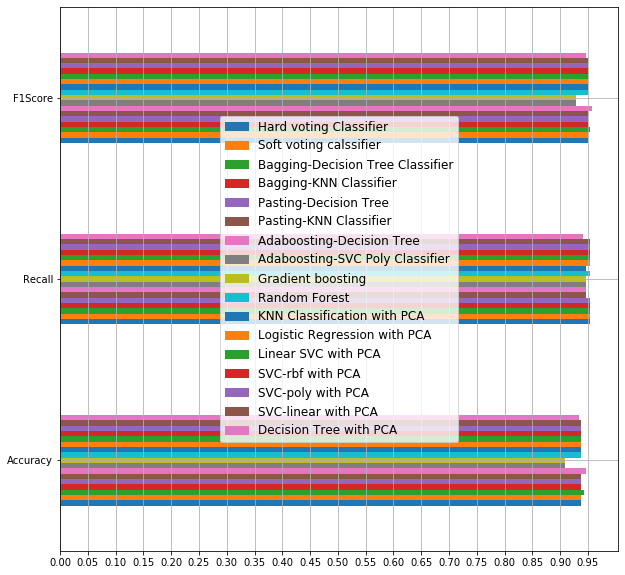

In [138]:
pd.DataFrame(df1).plot(kind='barh',figsize=(10,10))
plt.grid(which='both')
plt.xticks(np.arange(0,1,step=0.05))
plt.legend(loc='center',prop={'size':12})

In [139]:
import pandas as pd
project_1=pd.DataFrame({"classifier":["KNN Classification without PCA","KNN Classification with PCA","Logistic Regression without PCA","Logistic Regression with PCA","Linear_SVC without PCA","Linear_SVC with PCA","SVC_RBF Kernel without PCA","SVC_RBF Kernel with PCA","SVC_Poly Kernel without PCA","SVC_Poly Kernel with PCA","Decision Tree without PCA","Decision Tree with PCA","SVC linear kernal without PCA ","SVC linear kernal with PCA"],
                        "Train Score":[0.9389,0.9461,0.9461,0.9420,0.9461,0.9440,0.6070,0.9440,0.9472,0.9440,0.9472, 0.9440,0.9482,0.9400],
                        "Test score":[0.9380,0.9380,0.9339,0.9380,0.9380, 0.9380,0.6240,0.9380,0.9380,0.9380,0.9380,0.9380,0.9380,0.9340],
                        "Accuracy":[93.80,93.80,93.38,93.80,93.80,93.80,62.39,93.80, 93.80,93.80,62.39,93.80,93.80,93.38 ]})
project_1

,classifier,Train Score,Test score,Accuracy
0,KNN Classification without PCA,0.9389,0.9380,93.80
1,KNN Classification with PCA,0.9461,0.9380,93.80
2,Logistic Regression without PCA,0.9461,0.9339,93.38
3,Logistic Regression with PCA,0.9420,0.9380,93.80
4,Linear_SVC without PCA,0.9461,0.9380,93.80
5,Linear_SVC with PCA,0.9440,0.9380,93.80
6,SVC_RBF Kernel without PCA,0.6070,0.6240,62.39
7,SVC_RBF Kernel with PCA,0.9440,0.9380,93.80
8,SVC_Poly Kernel without PCA,0.9472,0.9380,93.80
9,SVC_Poly Kernel with PCA,0.9440,0.9380,93.80


### BEFORE PCA

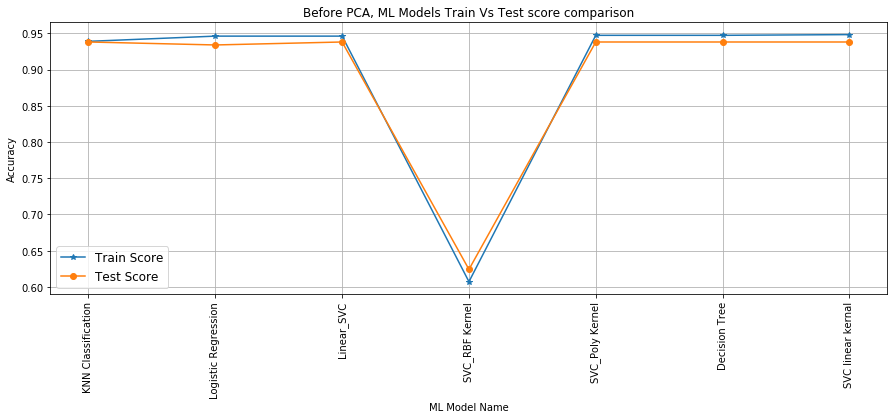

In [140]:
import matplotlib.pyplot as plt
btrainscore=[0.9389,0.9461,0.9461,0.6070,0.9472,0.9472, 0.9482]              
btestscore =[0.9380,0.9339,0.9380,0.6240,0.9380,0.9380,0.9380]
Models=["KNN Classification","Logistic Regression","Linear_SVC","SVC_RBF Kernel","SVC_Poly Kernel","Decision Tree","SVC linear kernal"]
                  
plt.figure(figsize=(15,5))
plt.plot(Models,btrainscore,marker='*',label='Train Score')
plt.plot(Models,btestscore,marker='o',label='Test Score')
plt.legend(prop={'size': 12})
plt.grid()
plt.xticks(rotation='vertical')
plt.title('Before PCA, ML Models Train Vs Test score comparison')
plt.xlabel('ML Model Name')
plt.ylabel('Accuracy')
plt.show()

Before PCA, we find that SVM Kernel poly was the better model with low test and train score difference.

### AFTER PCA

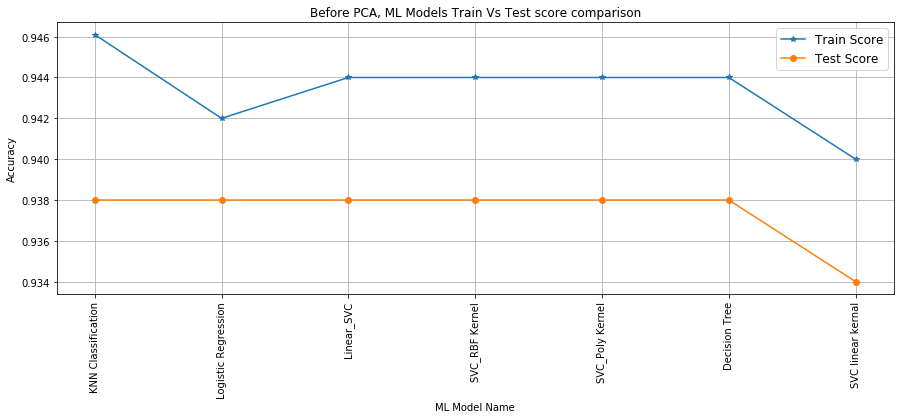

In [141]:
import matplotlib.pyplot as plt
btrainscore=[0.9461,0.9420,0.9440,0.9440,0.9440, 0.9440,0.9400]
                                
btestscore =[0.9380,0.9380, 0.9380,0.9380,0.9380,0.9380,0.9340]
Models=["KNN Classification","Logistic Regression","Linear_SVC","SVC_RBF Kernel","SVC_Poly Kernel","Decision Tree","SVC linear kernal"]
                   
plt.figure(figsize=(15,5))
plt.plot(Models,btrainscore,marker='*',label='Train Score')
plt.plot(Models,btestscore,marker='o',label='Test Score')
plt.legend(prop={'size': 12})
plt.grid()
plt.xticks(rotation='vertical')
plt.title('Before PCA, ML Models Train Vs Test score comparison')
plt.xlabel('ML Model Name')
plt.ylabel('Accuracy')
plt.show()

After PCA was performed, we find that KNN model was better with a higher train and lower difference with test and train score

OverAll, we find that after use of PCA on the dataset, KNN and SVC RBF have performed better than before. This is owed to the dimension reduction in the dataset.

For our dataset, we see that KNN has performed better as its accuracy and test and train core difference is less after PCA. 

BEST MODEL OVERALL:
KNN Classifier with Train - 0.946 and test= 0.9380 and accuracy 93.80

## Deep Learning Tasks

### Neural Networks

In [142]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy

# fix random seed for reproducibility
numpy.random.seed(10)

In [143]:
import tensorflow as tf

In [144]:
model = Sequential()
model.add(Dense(12, input_dim=43, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [145]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [146]:
X_train=np.asarray(X_train)
y_train = np.asarray(y_train)
X_test=np.asarray(X_test)
y_test = np.asarray(y_test)

In [147]:
from tensorflow import keras
neural_model=model.fit(X_train, y_train, epochs=150,batch_size=10)

Epoch 1/150
97/97 [==============================] - 0s 1ms/step - loss: 0.6643 - accuracy: 0.4777
Epoch 2/150
97/97 [==============================] - 0s 1ms/step - loss: 0.5585 - accuracy: 0.8176
Epoch 3/150
97/97 [==============================] - 0s 1ms/step - loss: 0.4940 - accuracy: 0.9244
Epoch 4/150
97/97 [==============================] - 0s 1ms/step - loss: 0.4598 - accuracy: 0.9358
Epoch 5/150
97/97 [==============================] - 0s 1ms/step - loss: 0.4340 - accuracy: 0.9430
Epoch 6/150
97/97 [==============================] - 0s 1ms/step - loss: 0.4135 - accuracy: 0.9451
Epoch 7/150
97/97 [==============================] - 0s 1ms/step - loss: 0.3951 - accuracy: 0.9451
Epoch 8/150
97/97 [==============================] - 0s 1ms/step - loss: 0.3774 - accuracy: 0.9451
Epoch 9/150
97/97 [==============================] - 0s 1ms/step - loss: 0.3626 - accuracy: 0.9451
Epoch 10/150
97/97 [==============================] - 0s 1ms/step - loss: 0.3490 - accuracy: 0.9451
Epoch 11/

evaluate the model

In [148]:
scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

8/8 [==============================] - 0s 876us/step - loss: 0.3090 - accuracy: 0.9298

accuracy: 92.98%


### Single Layer Perceptron

In [149]:
def create_model():
    #step 1: build model
    model = Sequential()
    #input layer
    model.add(Dense(12, input_dim = 43, activation = 'relu'))
    #hidden layers
    #output layer
    model.add(Dense(1, activation = 'sigmoid'))
    #step 2: make computational graph - compile
    model.compile(loss= 'binary_crossentropy' , optimizer = 'adam',metrics = ['accuracy'] )
    return model

In [150]:
seed = 10
np.random.seed(10)

In [151]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

model = KerasClassifier(build_fn = create_model, verbose = 0)

param_grid = {'batch_size':[10,30,40] , 'epochs':[50, 100]}
grid_search = GridSearchCV(estimator= model, param_grid = param_grid, cv = 5)

In [152]:
grid_search_result = grid_search.fit(X_train, y_train)

In [153]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'batch_size': 40, 'epochs': 50}
Best cross-validation score: 0.95


In [154]:
#step 1: build model
model1 = Sequential()
#input layer
model1.add(Dense(12, input_dim = 43, activation = 'relu'))
#hidden layers
#output layer
model1.add(Dense(1, activation = 'sigmoid'))
#step 2: make computational graph - compile
model1.compile(loss= 'binary_crossentropy' , optimizer = 'adam',metrics = ['accuracy'] )

In [155]:
# Fit the model
model1.fit(X_train, y_train, epochs=100, batch_size=30)

Epoch 1/100
33/33 [==============================] - 0s 997us/step - loss: 0.7132 - accuracy: 0.5824
Epoch 2/100
33/33 [==============================] - 0s 1ms/step - loss: 0.6381 - accuracy: 0.6456
Epoch 3/100
33/33 [==============================] - 0s 1ms/step - loss: 0.5715 - accuracy: 0.7254
Epoch 4/100
33/33 [==============================] - 0s 1ms/step - loss: 0.5078 - accuracy: 0.8093
Epoch 5/100
33/33 [==============================] - 0s 1ms/step - loss: 0.4451 - accuracy: 0.8570
Epoch 6/100
33/33 [==============================] - 0s 1ms/step - loss: 0.3805 - accuracy: 0.8902
Epoch 7/100
33/33 [==============================] - 0s 1ms/step - loss: 0.3227 - accuracy: 0.9130
Epoch 8/100
33/33 [==============================] - 0s 1ms/step - loss: 0.2798 - accuracy: 0.9233
Epoch 9/100
33/33 [==============================] - 0s 1ms/step - loss: 0.2519 - accuracy: 0.9275
Epoch 10/100
33/33 [==============================] - 0s 1ms/step - loss: 0.2322 - accuracy: 0.9306
Epoch 1

### Evaluation Metrics

In [156]:
model1.evaluate(X_train, y_train)

31/31 [==============================] - 0s 837us/step - loss: 0.1397 - accuracy: 0.9544


[0.13971954584121704, 0.9544041156768799]

In [157]:
model1.evaluate(X_test, y_test)

8/8 [==============================] - 0s 997us/step - loss: 0.2075 - accuracy: 0.9380


[0.2074800431728363, 0.9380165338516235]

#### Prediction Score

In [158]:
import tensorflow as tf 
import logging
tf.get_logger().setLevel(logging.ERROR)
train_pred=model1.predict_classes(X_train)
pred=model1.predict_classes(X_test)

In [159]:
from sklearn.metrics import precision_score
print("train",precision_score(y_train, train_pred))
print("test",precision_score(y_test,pred))

train 0.9257425742574258
test 0.9042553191489362


# 2.Multi-Level Perceptron

In [160]:
def create_model1():
    #step 1: build model
    model1 = Sequential()
    #input layer
    model1.add(Dense(30, input_dim = 76, activation = 'relu'))
    #hidden layers
    model1.add(Dense(20, activation = 'relu'))
    model1.add(Dense(10, activation = 'relu'))
    #output layer
    model1.add(Dense(1, activation = 'sigmoid'))

    #step 2: make computational graph - compile
    model1.compile(loss= 'binary_crossentropy' , optimizer = 'adam',metrics = ['accuracy'] )
    return model1

In [161]:
from sklearn.model_selection import GridSearchCV

model = KerasClassifier(build_fn = create_model, verbose = 0)

param_grid = {'batch_size':[10,30,40] , 'epochs':[50, 100]}
grid_search = GridSearchCV(estimator= model, param_grid = param_grid, cv = 5)

In [162]:
grid_search_result = grid_search.fit(X_train, y_train)

In [163]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'batch_size': 40, 'epochs': 50}
Best cross-validation score: 0.95


In [164]:
#step 1: build model
model1 = Sequential()
#input layer
model1.add(Dense(30, input_dim = 43, activation = 'relu'))
#hidden layers
model1.add(Dense(20, activation = 'relu'))
model1.add(Dense(10, activation = 'relu'))
#output layer
model1.add(Dense(1, activation = 'sigmoid'))

#step 2: make computational graph - compile
model1.compile(loss= 'binary_crossentropy' , optimizer = 'adam',metrics = ['accuracy'] )

In [165]:
# Fit the model
model1.fit(X_train, y_train, epochs=100, batch_size=30)

Epoch 1/100
33/33 [==============================] - 0s 1ms/step - loss: 0.6818 - accuracy: 0.5399
Epoch 2/100
33/33 [==============================] - 0s 1ms/step - loss: 0.5995 - accuracy: 0.6508
Epoch 3/100
33/33 [==============================] - 0s 1ms/step - loss: 0.4570 - accuracy: 0.8902
Epoch 4/100
33/33 [==============================] - 0s 1ms/step - loss: 0.2822 - accuracy: 0.9347
Epoch 5/100
33/33 [==============================] - 0s 1ms/step - loss: 0.2148 - accuracy: 0.9430
Epoch 6/100
33/33 [==============================] - 0s 1ms/step - loss: 0.1988 - accuracy: 0.9430
Epoch 7/100
33/33 [==============================] - 0s 1ms/step - loss: 0.1877 - accuracy: 0.9451
Epoch 8/100
33/33 [==============================] - 0s 1ms/step - loss: 0.1799 - accuracy: 0.9461
Epoch 9/100
33/33 [==============================] - 0s 1ms/step - loss: 0.1761 - accuracy: 0.9451
Epoch 10/100
33/33 [==============================] - 0s 1ms/step - loss: 0.1717 - accuracy: 0.9451
Epoch 11/

### Multi Layer Perceptron Evaluation Metrics


In [166]:
model1.evaluate(X_train, y_train)

31/31 [==============================] - 0s 740us/step - loss: 0.0652 - accuracy: 0.9720


[0.0652037039399147, 0.9720207452774048]

In [167]:
model1.evaluate(X_test, y_test)

8/8 [==============================] - 0s 1ms/step - loss: 0.4219 - accuracy: 0.9298


[0.42187103629112244, 0.9297520518302917]

### Multi Layer Perceptron Precision Scores

In [168]:
train_pred=model1.predict_classes(X_train)
pred=model1.predict_classes(X_test)

In [169]:
print("train",precision_score(y_train, train_pred))
print("test",precision_score(y_test,pred))

train 0.941320293398533
test 0.8936170212765957


In [170]:
from sklearn.metrics import recall_score
print("train",recall_score(y_train, train_pred))
print("test",recall_score(y_test,pred))

train 0.9922680412371134
test 0.9230769230769231
